In [3]:
import pandas as pd
pd.options.display.max_rows = 999
import numpy as np
import matplotlib.pyplot as plt

## Exploratory Data Analysis

In [8]:
#load data
xls = pd.ExcelFile('bank_term_deposit_marketing_analysis.xlsx')

In [10]:
#check out all the sheets
xls.sheet_names

['PROCEDURE',
 'DATA DESCRIPTION',
 'Step 1 - Collect Information',
 'CLIENT_INFO',
 'LOAN_HISTORY',
 'MARKETING HISTORY',
 'SUBSCRIPTION HISTORY',
 'Step 2 - Merge Information',
 'CLIENT_MERGE',
 'Step 3 - Marketing Analysis',
 'DAILY RANGE',
 'JOB ANALYSIS',
 'Sheet3']

In [11]:
#select only sheets that we want
#create seperate dataframe for each sheet
client_info = pd.read_excel(xls, 'CLIENT_INFO')
loan_history = pd.read_excel(xls, 'LOAN_HISTORY')
marketing_history = pd.read_excel(xls, 'MARKETING HISTORY')
subscription_history = pd.read_excel(xls, 'SUBSCRIPTION HISTORY')

In [12]:
#preview
client_info.head()

,ID,AGE,JOB,MARITAL,EDUCATION
0,2836,58,management,married,tertiary
1,2837,44,technician,single,secondary
2,2838,33,entrepreneur,married,secondary
3,2839,47,blue-collar,married,unknown
4,2840,33,unknown,single,unknown


In [13]:
#preview
loan_history.head()

,ID,DEFAULT,BALANCE,HOUSING,LOAN
0,2836,no,2143,yes,no
1,2837,no,29,yes,no
2,2838,no,2,yes,yes
3,2839,no,1506,yes,no
4,2840,no,1,no,no


In [14]:
#preview
marketing_history.head()

,ID,CONTACT,DAY,MONTH,DURATION,CAMPAIGN,PDAYS,PREVIOUS,POUTCOME
0,2836,unknown,5,may,261,1,-1,0,unknown
1,2837,unknown,5,may,151,1,-1,0,unknown
2,2838,unknown,5,may,76,1,-1,0,unknown
3,2839,unknown,5,may,92,1,-1,0,unknown
4,2840,unknown,5,may,198,1,-1,0,unknown


In [15]:
#preview
subscription_history.head()

#no = client did not enroll
#yes = client enrolled
#binary classification problem

,ID,TERM_DEPOSIT
0,2836,no
1,2837,no
2,2838,no
3,2839,no
4,2840,no


In [16]:
#combine dataframe
df = pd.merge(client_info, loan_history, on=['ID'])
df = pd.merge(df, marketing_history, on=['ID'])
df = pd.merge(df, subscription_history, on=['ID'])

#preview
df.head()

,ID,AGE,JOB,MARITAL,EDUCATION,DEFAULT,BALANCE,HOUSING,LOAN,CONTACT,DAY,MONTH,DURATION,CAMPAIGN,PDAYS,PREVIOUS,POUTCOME,TERM_DEPOSIT
0,2836,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,2837,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,2838,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,2839,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,2840,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [17]:
#drop 'ID' since it is not predictive
df = df.drop(columns=['ID'], axis=1)
df.head()

,AGE,JOB,MARITAL,EDUCATION,DEFAULT,BALANCE,HOUSING,LOAN,CONTACT,DAY,MONTH,DURATION,CAMPAIGN,PDAYS,PREVIOUS,POUTCOME,TERM_DEPOSIT
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [18]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   AGE           45211 non-null  int64 
 1   JOB           45211 non-null  object
 2   MARITAL       45211 non-null  object
 3   EDUCATION     45211 non-null  object
 4   DEFAULT       45211 non-null  object
 5   BALANCE       45211 non-null  int64 
 6   HOUSING       45211 non-null  object
 7   LOAN          45211 non-null  object
 8   CONTACT       45211 non-null  object
 9   DAY           45211 non-null  int64 
 10  MONTH         45211 non-null  object
 11  DURATION      45211 non-null  int64 
 12  CAMPAIGN      45211 non-null  int64 
 13  PDAYS         45211 non-null  int64 
 14  PREVIOUS      45211 non-null  int64 
 15  POUTCOME      45211 non-null  object
 16  TERM_DEPOSIT  45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 6.2+ MB


## Data Prep & Start H2O

In [19]:
#start H2O cluster
! pip install h2o
import h2o

#initialize
h2o.init()

     |████████████████████████████████| 175.8 MB 36 kB/s 
  Created wheel for h2o: filename=h2o-3.34.0.1-py2.py3-none-any.whl size=175823552 sha256=d4f11385657cccfb698a80e88df0673b71676dbafa38b2f9c5a131d5138a7edd
  Stored in directory: /root/.cache/pip/wheels/5c/7b/60/014a2b6d009793271276a9a41cb954659c8f23b8823ca21625
Successfully built h2o
Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.11" 2021-04-20; OpenJDK Runtime Environment (build 11.0.11+9-Ubuntu-0ubuntu2.18.04); OpenJDK 64-Bit Server VM (build 11.0.11+9-Ubuntu-0ubuntu2.18.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp5apxu_pg
  JVM stdout: /tmp/tmp5apxu_pg/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp5apxu_pg/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting

H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.34.0.1
H2O_cluster_version_age:,16 days
H2O_cluster_name:,H2O_from_python_unknownUser_8hxe0s
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [20]:
#convert pandas df into h2o frame
h2o_df = h2o.H2OFrame(df)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [21]:
h2o_df.to_csv('h2o_df.csv')

AttributeError: ignored

In [24]:
#preview
h2o_df

AGE,JOB,MARITAL,EDUCATION,DEFAULT,BALANCE,HOUSING,LOAN,CONTACT,DAY,MONTH,DURATION,CAMPAIGN,PDAYS,PREVIOUS,POUTCOME,TERM_DEPOSIT
58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [25]:
#statistics
h2o_df.describe()

#enum ~ categorical data

Rows:45211
Cols:17




,AGE,JOB,MARITAL,EDUCATION,DEFAULT,BALANCE,HOUSING,LOAN,CONTACT,DAY,MONTH,DURATION,CAMPAIGN,PDAYS,PREVIOUS,POUTCOME,TERM_DEPOSIT
type,int,enum,enum,enum,enum,int,enum,enum,enum,int,enum,int,int,int,int,enum,enum
mins,18.0,,,,,-8019.0,,,,1.0,,0.0,1.0,-1.0,0.0,,
mean,40.93621021432807,,,,,1362.2720576850802,,,,15.806418791886923,,258.16307978146915,2.7638406582468997,40.19782796222158,0.5803233726305561,,
maxs,95.0,,,,,102127.0,,,,31.0,,4918.0,63.0,871.0,275.0,,
sigma,10.618762040975398,,,,,3044.7658291685216,,,,8.32247615304459,,257.52781226517124,3.0980208832791805,100.12874599059822,2.303441044931215,,
zeros,0,,,,,3514,,,,0,,3,0,0,36954,,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,58.0,management,married,tertiary,no,2143.0,yes,no,unknown,5.0,may,261.0,1.0,-1.0,0.0,unknown,no
1,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5.0,may,151.0,1.0,-1.0,0.0,unknown,no
2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5.0,may,76.0,1.0,-1.0,0.0,unknown,no


In [26]:
#split train and test sets
train, test = h2o_df.split_frame(ratios=[.75])

#define X and y
X = train.columns
y = 'TERM_DEPOSIT'
X.remove(y)

In [27]:
X

['AGE',
 'JOB',
 'MARITAL',
 'EDUCATION',
 'DEFAULT',
 'BALANCE',
 'HOUSING',
 'LOAN',
 'CONTACT',
 'DAY',
 'MONTH',
 'DURATION',
 'CAMPAIGN',
 'PDAYS',
 'PREVIOUS',
 'POUTCOME']

In [28]:
y

'TERM_DEPOSIT'

## Run H2O AutoML

In [29]:
#check class distribution
df.TERM_DEPOSIT.value_counts()

no     39922
yes     5289
Name: TERM_DEPOSIT, dtype: int64

In [30]:
from h2o.automl import H2OAutoML

#initialize
aml = H2OAutoML(max_runtime_secs=600,   #keep runtime at 10mins
                balance_classes=True,
                stopping_metric='logloss',
                seed=1,
                project_name='Final') 

In [31]:
#train
%time 
aml.train(x=X, 
          y=y,
          training_frame=train)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.15 µs
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_2_AutoML_1_20210930_234538

No model summary for this model

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.03193192332917999
RMSE: 0.17869505681238076
LogLoss: 0.1139028949512761
Null degrees of freedom: 10060
Residual degrees of freedom: 10050
Null deviance: 7237.296064528888
Residual deviance: 2291.9540522095776
AIC: 2313.9540522095776
AUC: 0.9869922162803945
AUCPR: 0.9266942626487735
Gini: 0.9739844325607889

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5191167616456421: 


,,no,yes,Error,Rate
0,no,8751.0,139.0,0.0156,(139.0/8890.0)
1,yes,231.0,940.0,0.1973,(231.0/1171.0)
2,Total,8982.0,1079.0,0.0368,(370.0/10061.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.519117,0.835556,151.0
1,max f2,0.373411,0.860602,199.0
2,max f0point5,0.621517,0.888938,119.0
3,max accuracy,0.564029,0.963622,137.0
4,max precision,0.991924,1.000000,0.0
5,max recall,0.021427,1.000000,365.0
6,max specificity,0.991924,1.000000,0.0
7,max absolute_mcc,0.519117,0.815756,151.0
8,max min_per_class_accuracy,0.284570,0.932536,231.0
9,max mean_per_class_accuracy,0.195752,0.939652,263.0



Gains/Lift Table: Avg response rate: 11.64 %, avg score: 12.88 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010039,0.944149,8.591802,8.591802,1.000000,0.978127,1.000000,0.978127,0.086251,0.086251,759.180188,759.180188,0.086251
1,2,0.020078,0.881837,8.591802,8.591802,1.000000,0.911933,1.000000,0.945030,0.086251,0.172502,759.180188,759.180188,0.172502
2,3,0.030017,0.821298,8.591802,8.591802,1.000000,0.847440,1.000000,0.912716,0.085397,0.257899,759.180188,759.180188,0.257899
3,4,0.040056,0.787085,8.506735,8.570482,0.990099,0.803391,0.997519,0.885317,0.085397,0.343296,750.673453,757.048227,0.343184
4,5,0.050094,0.747884,8.506735,8.557707,0.990099,0.767095,0.996032,0.861625,0.085397,0.428693,750.673453,755.770743,0.428468
5,6,0.100089,0.548128,6.832447,7.695934,0.795229,0.651457,0.895730,0.756646,0.341588,0.770282,583.244682,669.593376,0.758471
6,7,0.150084,0.344289,2.750060,6.048401,0.320080,0.439197,0.703974,0.650899,0.137489,0.907771,175.005985,504.840093,0.857490
7,8,0.200080,0.193838,1.383570,4.882773,0.161034,0.264219,0.568306,0.554277,0.069172,0.976943,38.357048,388.277265,0.879193
8,9,0.300070,0.061408,0.213514,3.326869,0.024851,0.113975,0.387214,0.407559,0.021349,0.998292,-78.648604,232.686863,0.790193
9,10,0.400060,0.023753,0.008541,2.497493,0.000994,0.037993,0.290683,0.315190,0.000854,0.999146,-99.145944,149.749272,0.677999




ModelMetricsBinomialGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.06098168112840743
RMSE: 0.24694469244834447
LogLoss: 0.19227518145628875
Null degrees of freedom: 33912
Residual degrees of freedom: 33903
Null deviance: 24449.462643225306
Residual deviance: 13041.256457454241
AIC: 13061.256457454241
AUC: 0.9378163710688834
AUCPR: 0.6336119344974124
Gini: 0.8756327421377668

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.29386594873781613: 


,,no,yes,Error,Rate
0,no,27518.0,2435.0,0.0813,(2435.0/29953.0)
1,yes,988.0,2972.0,0.2495,(988.0/3960.0)
2,Total,28506.0,5407.0,0.1009,(3423.0/33913.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.293866,0.634568,219.0
1,max f2,0.136570,0.746328,288.0
2,max f0point5,0.498069,0.615881,142.0
3,max accuracy,0.498069,0.910624,142.0
4,max precision,0.988637,1.000000,0.0
5,max recall,0.000446,1.000000,399.0
6,max specificity,0.988637,1.000000,0.0
7,max absolute_mcc,0.231199,0.589008,244.0
8,max min_per_class_accuracy,0.161133,0.868661,275.0
9,max mean_per_class_accuracy,0.110440,0.875740,302.0



Gains/Lift Table: Avg response rate: 11.68 %, avg score: 11.68 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010026,0.827325,7.128178,7.128178,0.832353,0.867993,0.832353,0.867993,0.071465,0.071465,612.817810,612.817810,0.069562
1,2,0.020022,0.760614,6.643961,6.886426,0.775811,0.791639,0.804124,0.829872,0.066414,0.137879,564.396100,588.642612,0.133438
2,3,0.030018,0.711753,5.810308,6.528072,0.678466,0.735146,0.762279,0.798328,0.058081,0.195960,481.030810,552.807247,0.187880
3,4,0.040014,0.674580,5.456637,6.260411,0.637168,0.693645,0.731024,0.772176,0.054545,0.250505,445.663717,526.041104,0.238319
4,5,0.050010,0.639028,5.507162,6.109850,0.643068,0.655355,0.713443,0.748826,0.055051,0.305556,450.716159,510.984997,0.289330
5,6,0.100021,0.476744,4.721248,5.415549,0.551297,0.558023,0.632370,0.653424,0.236111,0.541667,372.124771,441.554884,0.500035
6,7,0.150001,0.320108,3.622601,4.818134,0.423009,0.396136,0.562611,0.567695,0.181061,0.722727,262.260079,381.813446,0.648444
7,8,0.200012,0.191991,2.378297,4.208085,0.277712,0.251984,0.491375,0.488756,0.118939,0.841667,137.829697,320.808516,0.726486
8,9,0.300003,0.064383,1.096057,3.170844,0.127986,0.117617,0.370258,0.365055,0.109596,0.951263,9.605655,217.084425,0.737361
9,10,0.399994,0.025910,0.318210,2.457738,0.037157,0.041049,0.286989,0.284060,0.031818,0.983081,-68.179003,145.773826,0.660175


## AutoML Leaderboard and Ensemble Exploration

In [32]:
#view leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows) #show all the rows

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_AllModels_2_AutoML_1_20210930_234538,0.937816,0.192275,0.633612,0.165394,0.246945,0.0609817
StackedEnsemble_BestOfFamily_3_AutoML_1_20210930_234538,0.93748,0.192824,0.631224,0.16042,0.247368,0.0611908
StackedEnsemble_AllModels_1_AutoML_1_20210930_234538,0.937211,0.192958,0.630883,0.159953,0.247442,0.0612277
StackedEnsemble_BestOfFamily_2_AutoML_1_20210930_234538,0.93617,0.194512,0.624835,0.174399,0.248502,0.0617533
StackedEnsemble_BestOfFamily_1_AutoML_1_20210930_234538,0.935849,0.196242,0.62354,0.165516,0.249162,0.0620816
GBM_1_AutoML_1_20210930_234538,0.93502,0.20503,0.620931,0.168213,0.254968,0.0650089
GBM_2_AutoML_1_20210930_234538,0.934833,0.201438,0.621948,0.168633,0.252442,0.0637269
GBM_3_AutoML_1_20210930_234538,0.934673,0.203944,0.623898,0.173339,0.253723,0.0643753
XGBoost_3_AutoML_1_20210930_234538,0.93447,0.199221,0.620473,0.164568,0.250414,0.0627071
GBM_5_AutoML_1_20210930_234538,0.934249,0.200055,0.624003,0.156374,0.251437,0.0632206


In [33]:
#look at best model
se = aml.leader
metalearner = h2o.get_model(se.metalearner()['name'])

/usr/local/lib/python3.7/dist-packages/h2o/estimators/stackedensemble.py:929: H2ODeprecationWarning: The usage of stacked_ensemble.metalearner()['name'] will be deprecated. Metalearner now returns the metalearner object. If you need to get the 'name' please use stacked_ensemble.metalearner().model_id
  H2ODeprecationWarning


In [34]:
#look at important variables
metalearner.varimp()

[('DRF_1_AutoML_1_20210930_234538',
  0.8720811009407043,
  1.0,
  0.3057198054068248),
 ('XGBoost_3_AutoML_1_20210930_234538',
  0.6469679474830627,
  0.7418667217821663,
  0.22680334982104292),
 ('GBM_1_AutoML_1_20210930_234538',
  0.4086182713508606,
  0.46855535673240545,
  0.14324665248255639),
 ('GBM_3_AutoML_1_20210930_234538',
  0.3523136377334595,
  0.4039918275415241,
  0.12350830290194227),
 ('GBM_5_AutoML_1_20210930_234538',
  0.2484440952539444,
  0.2848864572181996,
  0.08709543226378771),
 ('GBM_2_AutoML_1_20210930_234538',
  0.19260641932487488,
  0.22085838016339585,
  0.06752078100601992),
 ('XGBoost_1_AutoML_1_20210930_234538',
  0.05292370170354843,
  0.060686674262818235,
  0.018553118246416155),
 ('XGBoost_2_AutoML_1_20210930_234538',
  0.03419150039553642,
  0.03920678977982028,
  0.011986292142112944),
 ('DeepLearning_1_AutoML_1_20210930_234538',
  0.024759983643889427,
  0.028391836054216864,
  0.008679946593637654),
 ('GBM_4_AutoML_1_20210930_234538',
  0.0196

## Base Learner XGBoost Model Exploration

In [39]:
#import top performing base learner
model = h2o.get_model('DRF_1_AutoML_1_20210930_234538')

In [40]:
#evaluate the base learner on the test set
model.model_performance(test)


ModelMetricsBinomial: drf
** Reported on test data. **

MSE: 0.08059330426927386
RMSE: 0.2838895987338632
LogLoss: 0.2915275586450243
Mean Per-Class Error: 0.13793516107608528
AUC: 0.923714493107716
AUCPR: 0.5905128043218393
Gini: 0.8474289862154321

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.08556063750612464: 


,,no,yes,Error,Rate
0,no,9044.0,925.0,0.0928,(925.0/9969.0)
1,yes,333.0,996.0,0.2506,(333.0/1329.0)
2,Total,9377.0,1921.0,0.1113,(1258.0/11298.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.085561,0.612923,281.0
1,max f2,0.051916,0.724545,316.0
2,max f0point5,0.155870,0.588424,222.0
3,max accuracy,0.167702,0.903788,214.0
4,max precision,0.940287,1.000000,0.0
5,max recall,0.000001,1.000000,399.0
6,max specificity,0.940287,1.000000,0.0
7,max absolute_mcc,0.074637,0.564485,291.0
8,max min_per_class_accuracy,0.048988,0.857788,320.0
9,max mean_per_class_accuracy,0.034027,0.862065,338.0



Gains/Lift Table: Avg response rate: 11.76 %, avg score:  4.95 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010002,0.549080,6.545117,6.545117,0.769912,0.684174,0.769912,0.684174,0.065463,0.065463,554.511676,554.511676,0.062855
1,2,0.020004,0.425467,6.620348,6.582732,0.778761,0.477360,0.774336,0.580767,0.066215,0.131678,562.034799,558.273238,0.126562
2,3,0.030005,0.362030,5.868036,6.344500,0.690265,0.390831,0.746313,0.517455,0.058691,0.190369,486.803572,534.450016,0.181742
3,4,0.040007,0.315570,5.266186,6.074922,0.619469,0.337047,0.714602,0.472353,0.052671,0.243040,426.618590,507.492159,0.230100
4,5,0.050009,0.279901,4.739567,5.807851,0.557522,0.296637,0.683186,0.437210,0.047404,0.290444,373.956731,480.785074,0.272488
5,6,0.100106,0.168584,4.475859,5.141266,0.526502,0.216180,0.604775,0.326597,0.224229,0.514673,347.585926,414.126614,0.469834
6,7,0.150292,0.102478,3.508402,4.596017,0.412698,0.132601,0.540636,0.261817,0.176072,0.690745,250.840231,359.601656,0.612502
7,8,0.200035,0.062701,2.541263,4.085056,0.298932,0.081128,0.480531,0.216885,0.126411,0.817156,154.126266,308.505563,0.699391
8,9,0.300053,0.022010,1.143515,3.104542,0.134513,0.039199,0.365192,0.157656,0.114372,0.931527,14.351465,210.454197,0.715658
9,10,0.399982,0.008351,0.368960,2.421100,0.043401,0.013925,0.284798,0.121747,0.036870,0.968397,-63.104047,142.110038,0.644192


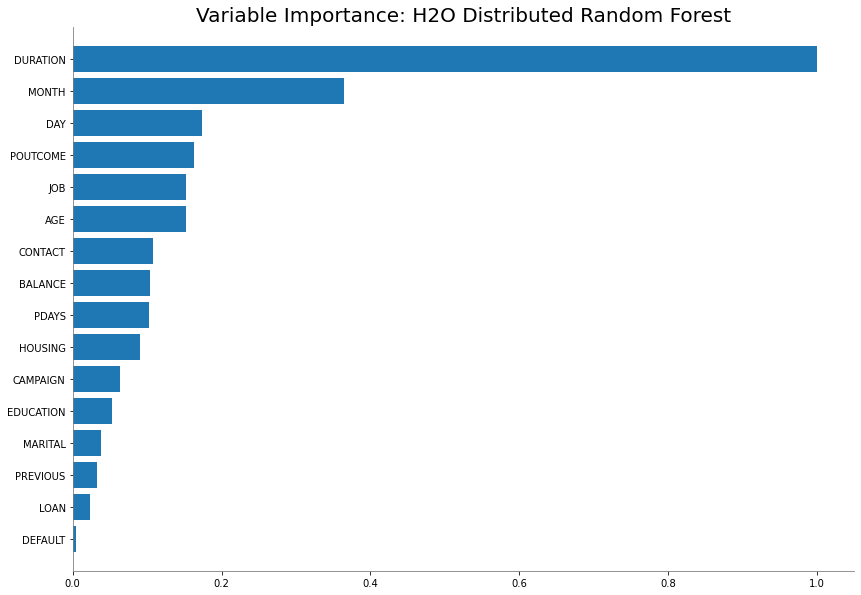

In [41]:
#look at important variable
model.varimp_plot(num_of_features=20)